In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hdd-failure-with-specs-2022.csv')
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,Company,Price(₩),Capacity(TB),RPM,Buffer(MB),Read rate(MB/s),Write rate(MB/s),Method,Warranty(Y),Thickness(mm)
0,2022-01-01,WDH1BET6,ST4000DM005,4000787030016,1,59.0,147088624.0,NaN,NaN,94.0,...,Seagate,248000.0,4.0,5900.0,64.0,180.0,180.0,NaN,2.0,26.10
1,2022-01-01,96BDP79NT,TOSHIBA MQ01ABF050,500107862016,1,100.0,0.0,100.0,0.0,100.0,...,Toshiba,58300.0,0.5,5400.0,8.0,NaN,NaN,NaN,3.0,7.00
2,2022-01-01,ZA180YKM,ST8000NM0055,8001563222016,1,84.0,235414912.0,NaN,NaN,92.0,...,Seagate,360000.0,8.0,7200.0,256.0,249.0,249.0,NaN,5.0,26.10
3,2022-01-02,ZHZ4YA04,ST12000NM0008,12000138625024,1,79.0,70963736.0,NaN,NaN,90.0,...,Seagate,459000.0,12.0,7200.0,256.0,261.0,261.0,NaN,NaN,26.10
4,2022-01-02,ZHZ3PXX8,ST12000NM0008,12000138625024,1,70.0,94032960.0,NaN,NaN,97.0,...,Seagate,459000.0,12.0,7200.0,256.0,261.0,261.0,NaN,NaN,26.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2022-12-28,ZL23XZGF,ST16000NM001G,16000900661248,1,73.0,21018248.0,NaN,NaN,96.0,...,Seagate,699000.0,16.0,7200.0,256.0,261.0,261.0,NaN,5.0,26.10
3154,2022-12-29,ZA10YNRM,ST8000DM002,8001563222016,1,77.0,189428104.0,NaN,NaN,84.0,...,Seagate,368229.0,8.0,7200.0,256.0,220.0,220.0,NaN,2.0,26.11
3155,2022-12-29,ZL23XS8L,ST16000NM001G,16000900661248,1,66.0,76739824.0,NaN,NaN,90.0,...,Seagate,699000.0,16.0,7200.0,256.0,261.0,261.0,NaN,5.0,26.10
3156,2022-12-29,ZL22YRHR,ST16000NM001G,16000900661248,1,79.0,166338600.0,NaN,NaN,96.0,...,Seagate,699000.0,16.0,7200.0,256.0,261.0,261.0,NaN,5.0,26.10


In [3]:
from sklearn.preprocessing import MinMaxScaler
data = df[['smart_9_raw', 'smart_241_raw']]
data = data.fillna(0)

scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

켜진 시간당 쓰기 횟수 (클러스터링 될 것 같아서 해봄)

In [4]:
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

c:\Users\seungmin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\seungmin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


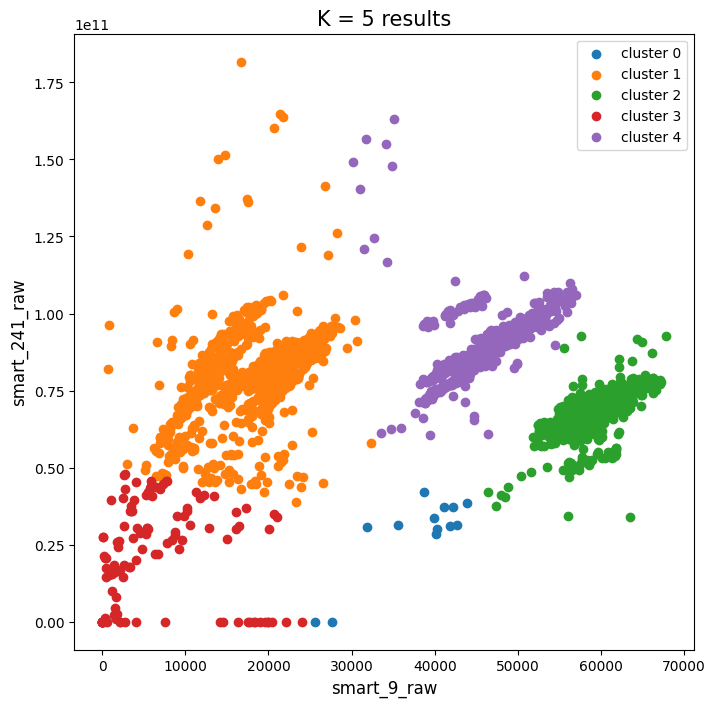

In [5]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'smart_9_raw'], df.loc[df['cluster'] == i, 'smart_241_raw'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('smart_9_raw', size = 12)
plt.ylabel('smart_241_raw', size = 12)
plt.show()

하드디스크 쓰기 횟수 히스토그램 그려 봄.
여기 있는 데이터는 failure된 데이터니 하드디스크가 죽을때까지의 최대 쓰기 횟수로 볼 수 있을듯?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


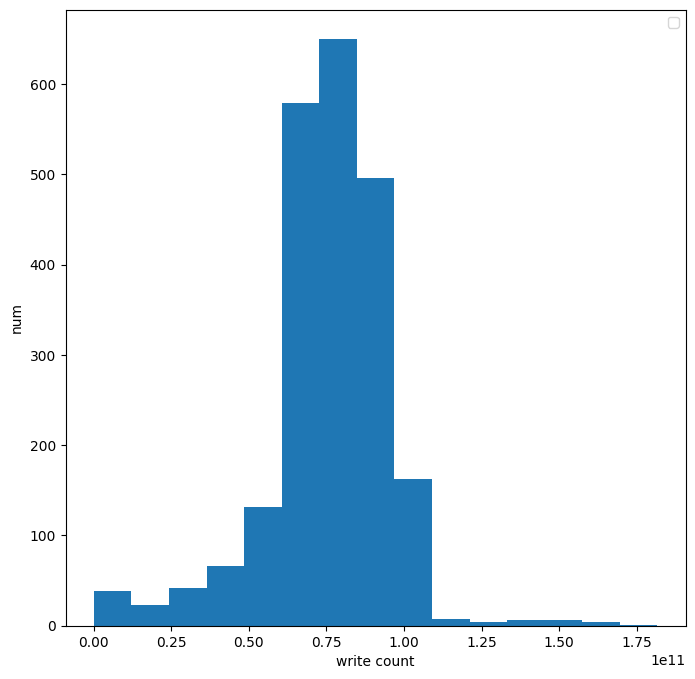

In [6]:
plt.figure(figsize = (8, 8))

plt.hist(df['smart_241_raw'], bins=15)

plt.legend()
plt.xlabel('write count')
plt.ylabel('num')
plt.show()

각 모델별 평균 failure날때까지 평균 쓰기 횟수

In [7]:
df = pd.read_csv('hdd-failure-with-specs-2022.csv')
data2 = df[['model', 'smart_241_raw']]
grp = data2.groupby(['model'], as_index=False).mean()
grp.dropna()

,model,smart_241_raw
3,HGST HUH721212ALE600,1.179643e+11
10,ST10000NM001G,3.214560e+06
11,ST10000NM0086,9.998158e+10
12,ST12000NM0007,8.797461e+10
13,ST12000NM0008,7.815222e+10
14,ST12000NM001G,6.841781e+10
15,ST12000NM0117,5.090424e+10
16,ST14000NM0018,6.978181e+10
17,ST14000NM001G,8.698629e+10
18,ST14000NM0138,8.325325e+10


평균이 의미있는지 보려고 만든 각 모델별 수명 히스토그램(특정 모델 빼고는 자료 부족해 보임)

array([[<Axes: title={'center': 'HGST HUH721212ALE600'}>,
        <Axes: title={'center': 'ST10000NM001G'}>,
        <Axes: title={'center': 'ST10000NM0086'}>,
        <Axes: title={'center': 'ST12000NM0007'}>,
        <Axes: title={'center': 'ST12000NM0008'}>],
       [<Axes: title={'center': 'ST12000NM001G'}>,
        <Axes: title={'center': 'ST12000NM0117'}>,
        <Axes: title={'center': 'ST14000NM0018'}>,
        <Axes: title={'center': 'ST14000NM001G'}>,
        <Axes: title={'center': 'ST14000NM0138'}>],
       [<Axes: title={'center': 'ST16000NM001G'}>,
        <Axes: title={'center': 'ST16000NM002J'}>,
        <Axes: title={'center': 'ST18000NM000J'}>,
        <Axes: title={'center': 'ST4000DM000'}>,
        <Axes: title={'center': 'ST4000DM005'}>],
       [<Axes: title={'center': 'ST500LM021'}>,
        <Axes: title={'center': 'ST500LM030'}>,
        <Axes: title={'center': 'ST6000DX000'}>,
        <Axes: title={'center': 'ST8000DM002'}>,
        <Axes: title={'center': 'ST

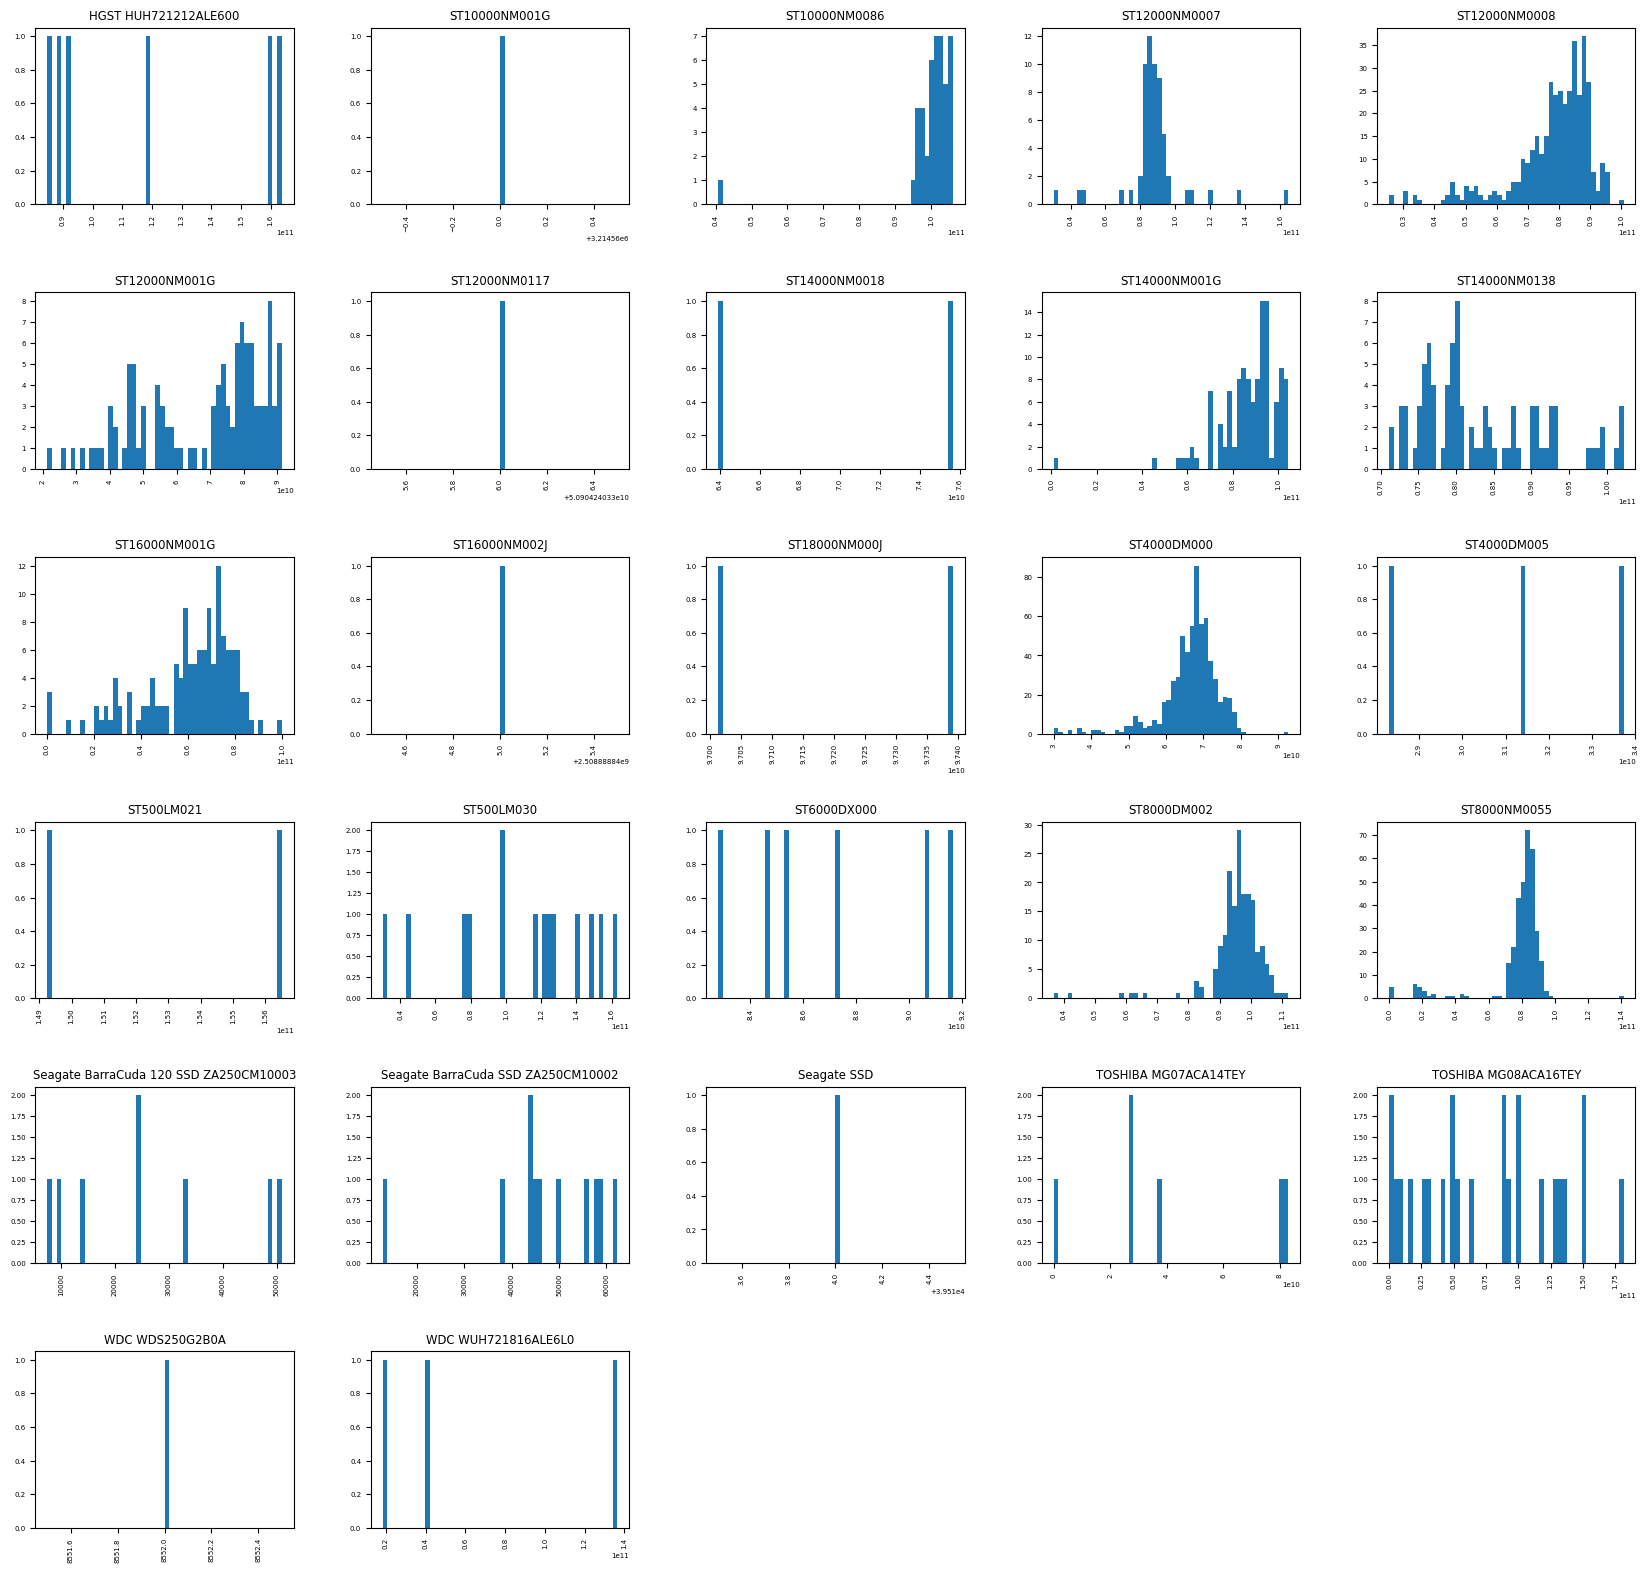

In [8]:
plt.rc('font', size=7)        # 기본 폰트 크기
plt.rc('axes', labelsize=5)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=5)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=5)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=5)  # 범례 폰트 크기
plt.rc('figure', titlesize=3) # figure title 폰트 크기
data2.dropna().hist(by='model', bins= 50, figsize=(20,20))